In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
%matplotlib inline

#resp = requests.get('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
#with open( 'owid-covid-data.csv', 'wb') as file:
#    file.write(resp.content)

In [2]:
pd.set_option("display.max_columns", 200)

In [3]:
df = pd.read_csv("owid-covid-data.csv")
df.head(10)
df['date'] = pd.to_datetime(df['date'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['iso_code'].astype(str))
df['iso_code'] = le.transform(df['iso_code'].astype(str))

le.fit(df['continent'].astype(str))
df['continent'] = le.transform(df['continent'].astype(str))

In [4]:
df_no_nan = df.apply(lambda x: x.replace([np.NaN], '0', regex=True) )
#df_no_nan = df_no_nan.apply(lambda x: 0 if isinstance(x, int) and x < 0 else x )

In [5]:
columns = [
    'iso_code', 'continent', 'date', 'total_cases', 
       'total_cases_per_million',
       'new_cases_per_million', 
       'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'new_cases'
]

In [6]:
df_no_nan = df_no_nan[columns].replace('[\D]', '0', regex=True)

/home/samuel/.virtualenvs/ds/local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='date'>

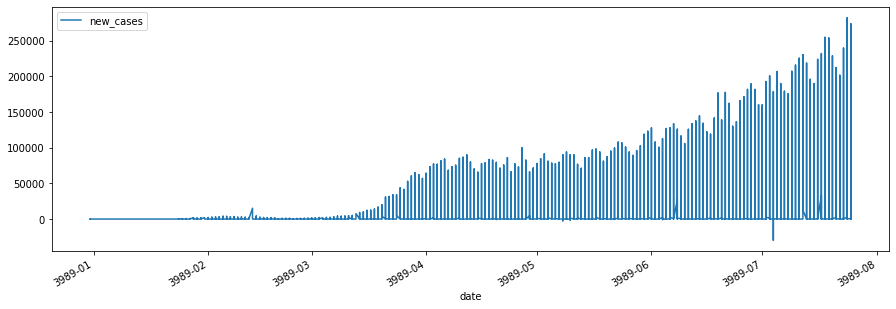

In [7]:
df_datetime = df_no_nan.copy()
df_datetime['new_cases'] = df_datetime['new_cases'].replace('[\D]', 0, regex=True)
df_datetime['new_cases'] = df_datetime['new_cases'].astype(int)
df_datetime['aged_65_older'] = df_datetime['aged_65_older'].astype(int)
df_datetime['aged_70_older'] = df_datetime['aged_70_older'].astype(int)
df_datetime.plot(x='date', y='new_cases', figsize=(15, 5))

<AxesSubplot:xlabel='date'>

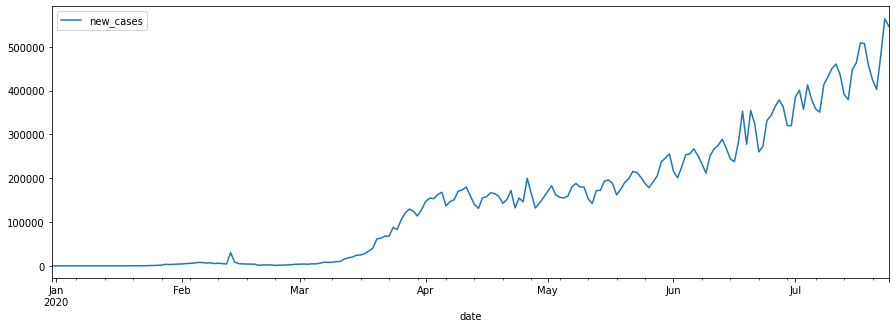

In [8]:
df_datetime = df_datetime.groupby(['date'])['new_cases'].agg('sum').reset_index()
df_datetime.plot(x='date', y='new_cases', figsize=(15, 5))

In [9]:
covid_train = df_datetime[ 
    (df_datetime['date'] > '2020-05-01') & 
    (df_datetime['date'] < '2020-07-01') & 
    (df_datetime['new_cases'] >= 0)
#    (df_datetime['aged_65_older'] > 0) &
#    (df_datetime['aged_70_older'] > 0)
]
covid_valid = df_datetime[ 
    (df_datetime['date'] >= '2020-07-01') & 
    (df_datetime['date'] <= '2020-07-23') & 
    (df_datetime['new_cases'] >= 0) 
#    (df_datetime['aged_65_older'] > 0) &
#    (df_datetime['aged_70_older'] > 0)
]
covid_train = covid_train.dropna()
covid_valid = covid_valid.dropna()

<AxesSubplot:xlabel='date'>

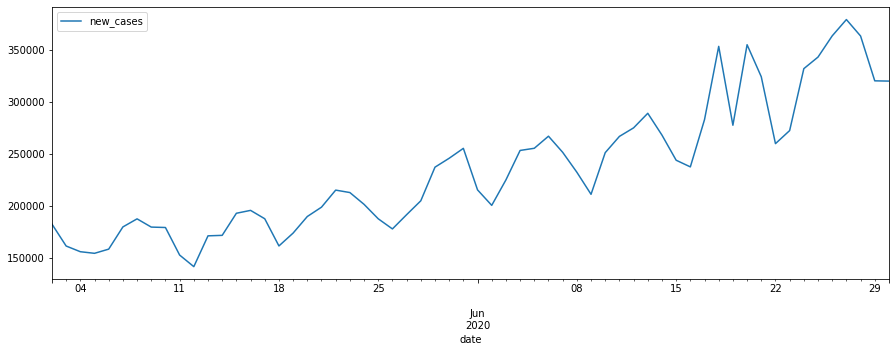

In [10]:
covid_train.plot.line(x='date', y='new_cases', figsize=(15, 5))

In [11]:
covid_train.shape, covid_valid.shape

((60, 2), (23, 2))

# Baseline

In [12]:
y_treino = covid_train['new_cases']
y_valid = covid_valid['new_cases']

In [13]:
baseline_train = covid_train['new_cases'].shift(1)
baseline_valid = covid_valid['new_cases'].shift(1)

In [14]:
covid_train.reset_index()

,index,date,new_cases
0,123,2020-05-02,182924
1,124,2020-05-03,161938
2,125,2020-05-04,156486
3,126,2020-05-05,154948
4,127,2020-05-06,158956
5,128,2020-05-07,180204
6,129,2020-05-08,187946
7,130,2020-05-09,180060
8,131,2020-05-10,179664
9,132,2020-05-11,153282


In [15]:
covid_valid.reset_index()

,index,date,new_cases
0,183,2020-07-01,385162
1,184,2020-07-02,400806
2,185,2020-07-03,356874
3,186,2020-07-04,413078
4,187,2020-07-05,379404
5,188,2020-07-06,357996
6,189,2020-07-07,350938
7,190,2020-07-08,413776
8,191,2020-07-09,431052
9,192,2020-07-10,450428


In [16]:
covid_train['baseline'] = baseline_train
covid_valid['baseline'] = baseline_valid

/home/samuel/.virtualenvs/ds/local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

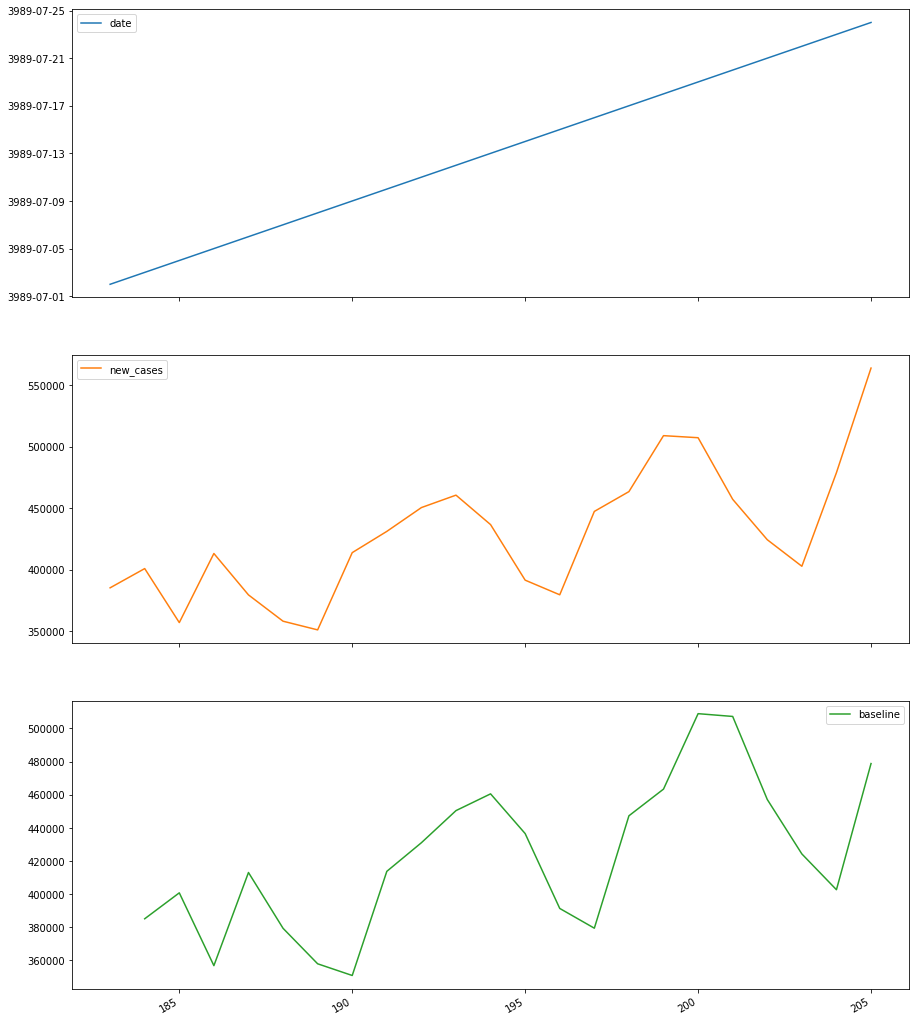

In [17]:
covid_valid.plot(figsize=(15, 20), subplots=True)

In [18]:
from sklearn.metrics import mean_squared_log_error

erro_baseline = np.sqrt(mean_squared_log_error(y_valid[baseline_valid.notnull()], baseline_valid[ baseline_valid.notnull() ] ))

# % de Erro

In [19]:
erro_baseline * 100

9.708286642100537

<AxesSubplot:xlabel='date'>

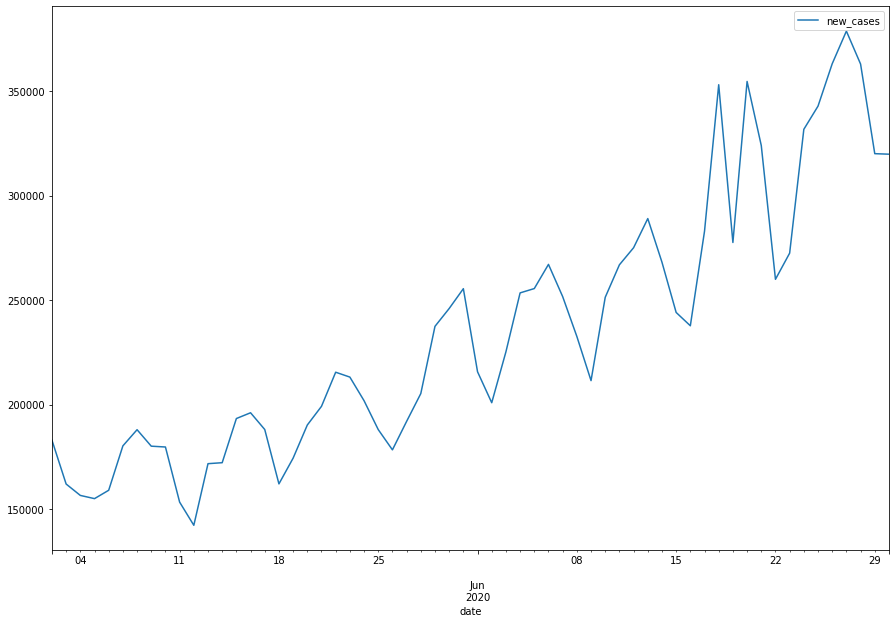

In [20]:
covid_train.plot(x='date', y='new_cases', figsize=(15,10))

In [21]:
def target_diff(x):
    return x.diff().shift(-1)

In [22]:
covid_train['diff_new_cases'] = covid_train['new_cases'].diff().shift(-1)
covid_valid['diff_new_cases'] = covid_valid['new_cases'].diff().shift(-1)

df_X_treino = pd.DataFrame()
df_X_valid = pd.DataFrame()

df_X_treino['diff_new_cases_next_day'] = covid_train['new_cases'].diff().shift(-1)
df_X_valid['diff_new_cases_next_day'] = covid_valid['new_cases'].diff().shift(-1)

<AxesSubplot:xlabel='date'>

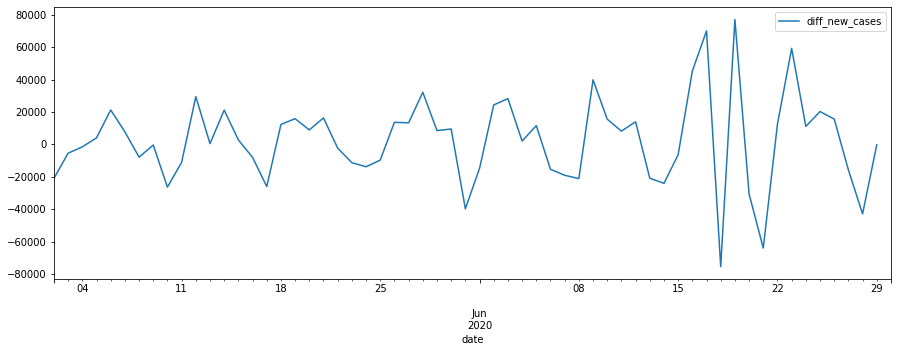

In [23]:
covid_train.plot(x='date', y='diff_new_cases', figsize=(15,5))

# Extrair variáveis

In [24]:
# Variáveis sazonais

df_X_treino['month'] = covid_train['date'].dt.month
df_X_treino['day'] = covid_train['date'].dt.day
df_X_treino['weekday'] = covid_train['date'].dt.weekday


df_X_valid['month'] = covid_valid['date'].dt.month
df_X_valid['day'] = covid_valid['date'].dt.day
df_X_valid['weekday'] = covid_valid['date'].dt.weekday


In [25]:
# Variáveis Lag
df_X_treino['current_new_cases'] = covid_train['new_cases']
df_X_valid['current_new_cases'] = covid_valid['new_cases']

In [26]:
# Variáveis Diff lag
df_X_treino['diff_current_new_cases'] = covid_train['new_cases'].diff()
df_X_valid['diff_current_new_cases'] = covid_valid['new_cases'].diff()

In [27]:
covid_valid

,date,new_cases,baseline,diff_new_cases
183,2020-07-01,385162,NaN,15644.0
184,2020-07-02,400806,385162.0,-43932.0
185,2020-07-03,356874,400806.0,56204.0
186,2020-07-04,413078,356874.0,-33674.0
187,2020-07-05,379404,413078.0,-21408.0
188,2020-07-06,357996,379404.0,-7058.0
189,2020-07-07,350938,357996.0,62838.0
190,2020-07-08,413776,350938.0,17276.0
191,2020-07-09,431052,413776.0,19376.0
192,2020-07-10,450428,431052.0,10110.0


In [28]:
df_X_valid

,diff_new_cases_next_day,month,day,weekday,current_new_cases,diff_current_new_cases
183,15644.0,7,1,2,385162,NaN
184,-43932.0,7,2,3,400806,15644.0
185,56204.0,7,3,4,356874,-43932.0
186,-33674.0,7,4,5,413078,56204.0
187,-21408.0,7,5,6,379404,-33674.0
188,-7058.0,7,6,0,357996,-21408.0
189,62838.0,7,7,1,350938,-7058.0
190,17276.0,7,8,2,413776,62838.0
191,19376.0,7,9,3,431052,17276.0
192,10110.0,7,10,4,450428,19376.0


In [29]:
#Variáveis Média movel
days = 5
df_X_valid['mean_current_days'] = covid_valid['new_cases'].rolling(days).mean()
df_X_treino['mean_current_days'] = covid_train['new_cases'].rolling(days).mean()


In [30]:
df_X_valid.head()

,diff_new_cases_next_day,month,day,weekday,current_new_cases,diff_current_new_cases,mean_current_days
183,15644.0,7,1,2,385162,NaN,NaN
184,-43932.0,7,2,3,400806,15644.0,NaN
185,56204.0,7,3,4,356874,-43932.0,NaN
186,-33674.0,7,4,5,413078,56204.0,NaN
187,-21408.0,7,5,6,379404,-33674.0,387064.8


In [31]:
df_X_treino.head()

,diff_new_cases_next_day,month,day,weekday,current_new_cases,diff_current_new_cases,mean_current_days
123,-20986.0,5,2,5,182924,NaN,NaN
124,-5452.0,5,3,6,161938,-20986.0,NaN
125,-1538.0,5,4,0,156486,-5452.0,NaN
126,4008.0,5,5,1,154948,-1538.0,NaN
127,21248.0,5,6,2,158956,4008.0,163050.4


In [32]:
from sklearn.ensemble import RandomForestRegressor
df_X_treino = df_X_treino.dropna()
df_X_valid = df_X_valid.dropna()

Xtr, ytr = df_X_treino.drop(['diff_new_cases_next_day'], axis=1), df_X_treino['diff_new_cases_next_day']
Xval, yval = df_X_valid.drop(['diff_new_cases_next_day'], axis=1), df_X_valid['diff_new_cases_next_day']

Xtr.isnull().mean()

month                     0.0
day                       0.0
weekday                   0.0
current_new_cases         0.0
diff_current_new_cases    0.0
mean_current_days         0.0
dtype: float64

In [33]:
df_X_valid

,diff_new_cases_next_day,month,day,weekday,current_new_cases,diff_current_new_cases,mean_current_days
187,-21408.0,7,5,6,379404,-33674.0,387064.8
188,-7058.0,7,6,0,357996,-21408.0,381631.6
189,62838.0,7,7,1,350938,-7058.0,371658.0
190,17276.0,7,8,2,413776,62838.0,383038.4
191,19376.0,7,9,3,431052,17276.0,386633.2
192,10110.0,7,10,4,450428,19376.0,400838.0
193,-23968.0,7,11,5,460538,10110.0,421346.4
194,-45178.0,7,12,6,436570,-23968.0,438472.8
195,-11914.0,7,13,0,391392,-45178.0,433996.0
196,67822.0,7,14,1,379478,-11914.0,423681.2


In [34]:
Xtr.head(10)

,month,day,weekday,current_new_cases,diff_current_new_cases,mean_current_days
127,5,6,2,158956,4008.0,163050.4
128,5,7,3,180204,21248.0,162506.4
129,5,8,4,187946,7742.0,167708.0
130,5,9,5,180060,-7886.0,172422.8
131,5,10,6,179664,-396.0,177366.0
132,5,11,0,153282,-26382.0,176231.2
133,5,12,1,142188,-11094.0,168628.0
134,5,13,2,171682,29494.0,165375.2
135,5,14,3,172148,466.0,163792.8
136,5,15,4,193290,21142.0,166518.0


In [35]:
ytr.head(10)

127    21248.0
128     7742.0
129    -7886.0
130     -396.0
131   -26382.0
132   -11094.0
133    29494.0
134      466.0
135    21142.0
136     2764.0
Name: diff_new_cases_next_day, dtype: float64

In [36]:
Xval

,month,day,weekday,current_new_cases,diff_current_new_cases,mean_current_days
187,7,5,6,379404,-33674.0,387064.8
188,7,6,0,357996,-21408.0,381631.6
189,7,7,1,350938,-7058.0,371658.0
190,7,8,2,413776,62838.0,383038.4
191,7,9,3,431052,17276.0,386633.2
192,7,10,4,450428,19376.0,400838.0
193,7,11,5,460538,10110.0,421346.4
194,7,12,6,436570,-23968.0,438472.8
195,7,13,0,391392,-45178.0,433996.0
196,7,14,1,379478,-11914.0,423681.2


In [37]:
mdl = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=1000)
mdl.fit(Xtr[['month', 'weekday', 'day']], ytr)
p = mdl.predict(Xval[['month','weekday', 'day']])

In [38]:
p_final = Xval['current_new_cases'] + p
yval_final = Xval['current_new_cases'] + yval
erro_2 = np.sqrt(mean_squared_log_error(yval_final, p_final )) * 100
yval_final

187    357996.0
188    350938.0
189    413776.0
190    431052.0
191    450428.0
192    460538.0
193    436570.0
194    391392.0
195    379478.0
196    447300.0
197    463406.0
198    508926.0
199    507250.0
200    457150.0
201    424286.0
202    402690.0
203    478822.0
204    563902.0
dtype: float64

In [39]:
yval_final.values,p_final.values

(array([357996., 350938., 413776., 431052., 450428., 460538., 436570.,
        391392., 379478., 447300., 463406., 508926., 507250., 457150.,
        424286., 402690., 478822., 563902.]),
 array([356882.552, 342260.402, 382653.388, 435351.658, 437908.538,
        460700.922, 442797.254, 410782.012, 382541.076, 417346.828,
        480784.904, 474846.578, 509687.77 , 476197.174, 418127.572,
        437472.798, 449196.678, 514604.19 ]))

In [40]:
var_menor_erro = None
valor_menor_erro = 1000.

for var in Xtr.columns:
    mdl = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=1000)
    mdl.fit(Xtr[[var]], ytr)
    p = mdl.predict(Xval[[var]])
    
    p_final = Xval['current_new_cases'] + p
    yval_final = Xval['current_new_cases'] + yval

    erro = np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100
    
    print("Variável: {} - Erro: {:.4f}\n".format(var, erro))
    
    if erro < valor_menor_erro:
        var_menor_erro = var
        valor_menor_erro = erro
        
print("Melhor Variável: {} - Erro: {:.4f}\n".format(var_menor_erro, valor_menor_erro))

Variável: month - Erro: 9.3516

Variável: day - Erro: 10.8132

Variável: weekday - Erro: 5.6752

Variável: current_new_cases - Erro: 12.6243

Variável: diff_current_new_cases - Erro: 10.2169

Variável: mean_current_days - Erro: 13.6126

Melhor Variável: weekday - Erro: 5.6752



In [41]:
mdl2 = RandomForestRegressor(n_jobs=-1, random_state=0, n_estimators=500)
mdl2.fit(Xtr[['weekday', 'day']], ytr)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

In [42]:
last_day = Xval[ (Xval['month'] == 7) & (Xval['day'] == 19) ]['current_new_cases'].values[0]

In [43]:
mdl2.predict([[5, 23]])[0] + last_day

443002.708

In [44]:
print(erro_baseline * 100)
print(erro_2)
yval_final.values,p_final.values

9.708286642100537
4.854887828506893


(array([357996., 350938., 413776., 431052., 450428., 460538., 436570.,
        391392., 379478., 447300., 463406., 508926., 507250., 457150.,
        424286., 402690., 478822., 563902.]),
 array([348714.428, 327306.428, 320248.428, 383086.428, 400362.428,
        419738.428, 429848.428, 405880.428, 360702.428, 348788.428,
        416610.428, 432716.428, 478236.428, 476560.428, 426460.428,
        393596.428, 372000.428, 448132.428]))